<a href="https://colab.research.google.com/github/ritik1804k/Unsupervised-ML-Capstone-Project-/blob/main/Unsupervised_ML_Capstone_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix movies and TV shows clustering



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual/
##### **Team Member 1 -** - $\color{RED}{\text{Ritik Koshta}}$

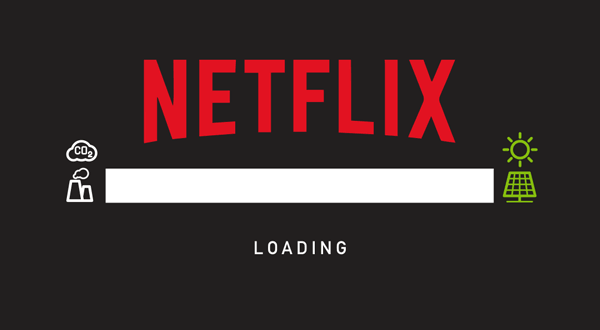

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -** https://github.com/ritik1804k/Unsupervised-ML-Capstone-Project-.git

https://github.com/ritik1804k/Unsupervised-ML-Capstone-Project-.git

# **Problem Statement**


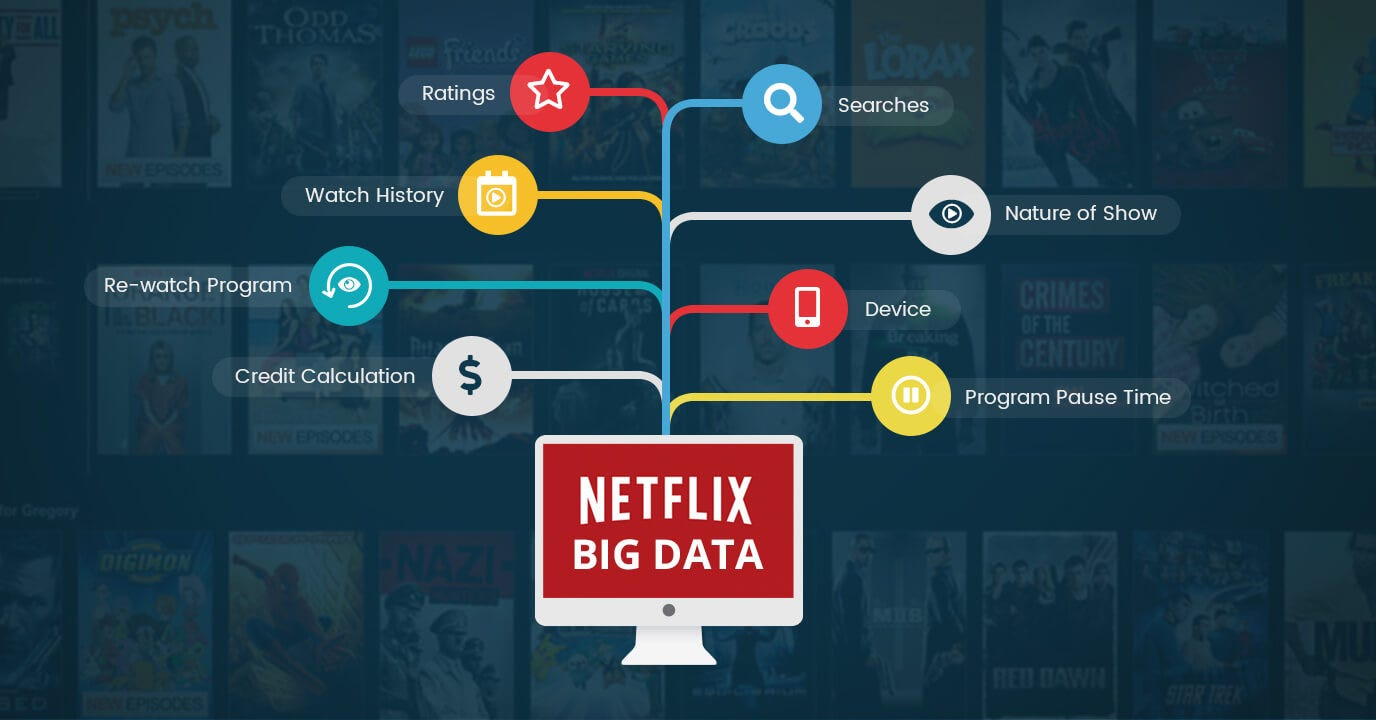


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

##**In this project, you are required to do**

Exploratory Data Analysis

Understanding what type content is available in different countries

Is Netflix has increasingly focusing on TV rather than movies in recent years.

Clustering similar content by matching text-based features

##**Attribute Information**

**show_id** : Unique ID for every Movie / Tv Show

**type** : Identifier - A Movie or TV Show

**title** : Title of the Movie / Tv Show

**director** : Director of the Movie

**cast** : Actors involved in the movie / show

**country** : Country where the movie / show was produced

**date_added** : Date it was added on Netflix

**release_year** : Actual Releaseyear of the movie / show

**rating** : TV Rating of the movie / show

**duration** : Total Duration - in minutes or number of seasons

**listed_in** : Genre

**description**: The Summary description

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
from sklearn.preprocessing import MultiLabelBinarizer 
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud, STOPWORDS
import re, string, unicodedata
import nltk

In [2]:
#import inflect
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
import inflect
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
string.punctuation
nltk.download('omw-1.4')
from nltk.tokenize import TweetTokenizer

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

%matplotlib inline
sns.set()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


### Dataset Loading

In [3]:
# Load Dataset
path = ('/content/NETFLIX CLUSTERING .csv.csv')

df = pd.read_csv(path , index_col = "show_id")

### Dataset First View

In [4]:
# Dataset First Look
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
#  bottom ten rows of dataframe
df.tail()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
df.shape

(7787, 11)

### Dataset Information

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7787 entries, s1 to s7787
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          7787 non-null   object
 1   title         7787 non-null   object
 2   director      5398 non-null   object
 3   cast          7069 non-null   object
 4   country       7280 non-null   object
 5   date_added    7777 non-null   object
 6   release_year  7787 non-null   int64 
 7   rating        7780 non-null   object
 8   duration      7787 non-null   object
 9   listed_in     7787 non-null   object
 10  description   7787 non-null   object
dtypes: int64(1), object(10)
memory usage: 730.0+ KB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
duplicate_rows =  df.duplicated().value_counts()
print(f'All the False value are for non-duplicate rows: {duplicate_rows}')

All the False value are for non-duplicate rows: False    7787
dtype: int64


#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
df.isna().sum().sort_values(ascending = False)

director        2389
cast             718
country          507
date_added        10
rating             7
type               0
title              0
release_year       0
duration           0
listed_in          0
description        0
dtype: int64

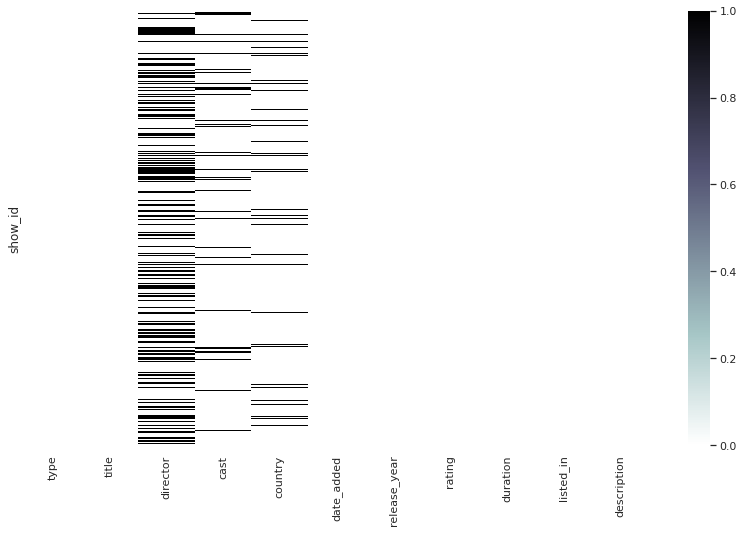

In [10]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
plt.figure(figsize=(14,8))
sns.heatmap(df.isnull(), cmap="bone_r",annot=False,yticklabels=False)
plt.show()

### What did you know about your dataset?

Few points on our dataset, so that we might get little intution of what we have done in some above codes:

* The size of our data contains 7787 columns & 11 Rows in our dataset.
* There are no duplicate rows in our dataframe.
* There  are five columns having some null values in them. The missing values in the director, cast, and country attributes can be replaced with 'Unknown'.
* 10 records with missing values in the date_added column can be dropped.
* The missing values in rating can be imputed with its mode, since this attribute is discrete.


In [11]:
# Handling the missing values
df[['director','cast','country']] = df[['director','cast','country']].fillna('Unknown')
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df.dropna(axis=0, inplace = True)

In [12]:
# Dataset Rows & Columns count
df.shape

(7777, 11)

We have successfully handled all the missing values in the dataset.

## ***2. Understanding Your Variables***

In [13]:
# Dataset Columns
df.columns

Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [14]:
# Dataset Describe all
df.describe(include='all')

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7777,7777,7777,7777,7777,7777,7777.000000,7777,7777,7777,7777
unique,2,7777,4050,6822,682,1565,NaN,14,216,491,7759
top,Movie,3%,Unknown,Unknown,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,5377,1,2379,718,2549,118,NaN,2868,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,2013.935965,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,8.760694,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description 

Answer Here

### Check Unique Values for each variable.

In [15]:
# Check Unique Values for each variable.
variable = df.columns
for num_col in variable:
    print(f"{num_col} : {df[num_col].nunique()} uniqueness variables.")

type : 2 uniqueness variables.
title : 7777 uniqueness variables.
director : 4050 uniqueness variables.
cast : 6822 uniqueness variables.
country : 682 uniqueness variables.
date_added : 1565 uniqueness variables.
release_year : 73 uniqueness variables.
rating : 14 uniqueness variables.
duration : 216 uniqueness variables.
listed_in : 491 uniqueness variables.
description : 7759 uniqueness variables.


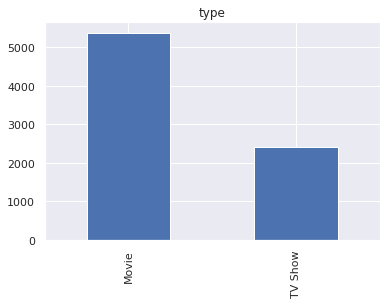

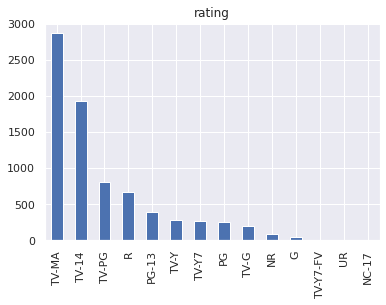

In [16]:
# Loop through each column in the dataset
for col in df[['type','rating']]:
    # Count the unique values in the column
    value_counts = df[col].value_counts()
    # Create a bar chart for the unique values
    value_counts.plot(kind='bar')
    # Set the title of the chart to the column name
    plt.title(col)
    # Show the chart
    plt.show()

## 3. ***Data Wrangling***

### Data Wrangling Code

###Country, listed_in:

In [17]:
# Write your code to make your dataset analysis ready.
# Top countries
df.country.value_counts()

United States                                                   2549
India                                                            923
Unknown                                                          506
United Kingdom                                                   396
Japan                                                            225
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 682, dtype: int64

In [18]:
# Genre of shows
df.listed_in.value_counts()

Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Anime Series, Crime TV Shows, TV Thrillers                                           1
Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows                         1
Crime TV Shows, International TV Shows, Reality TV                                   1
International Movies, Romantic Movies, Sci-Fi & Fantasy                              1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: listed_in, Length: 491, dtype: int64

In [19]:
# Choosing the primary country and primary genre to simplify the analysis
df['country'] = df['country'].apply(lambda x: x.split(',')[0])
df['listed_in'] = df['listed_in'].apply(lambda x: x.split(',')[0])

In [20]:
# contry in which a movie was produced
df['country'].value_counts()

United States     2877
India              956
United Kingdom     576
Unknown            506
Canada             259
                  ... 
Zimbabwe             1
Namibia              1
Soviet Union         1
Iran                 1
Somalia              1
Name: country, Length: 82, dtype: int64

In [21]:
# genre of shows
df['listed_in'].value_counts()

Dramas                          1384
Comedies                        1074
Documentaries                    751
Action & Adventure               721
International TV Shows           689
Children & Family Movies         502
Crime TV Shows                   369
Kids' TV                         357
Stand-Up Comedy                  321
Horror Movies                    244
British TV Shows                 231
Docuseries                       193
Anime Series                     147
International Movies             114
TV Comedies                      109
Reality TV                       102
Classic Movies                    77
TV Dramas                         62
Movies                            56
Thrillers                         49
TV Action & Adventure             36
Stand-Up Comedy & Talk Shows      33
Romantic TV Shows                 28
Independent Movies                20
Anime Features                    19
Classic & Cult TV                 19
Music & Musicals                  17
T

###Casting 'duration' from string to integer

In [22]:
# Splitting the duration column, and changing the datatype to integer
df['duration'] = df['duration'].apply(lambda x: int(x.split()[0]))

In [23]:
# Number of seasons for tv shows
df[df['type']=='TV Show'].duration.value_counts()

1     1608
2      378
3      183
4       86
5       57
6       30
7       19
8       18
9        8
10       5
11       2
12       2
15       2
13       1
16       1
Name: duration, dtype: int64

In [24]:
# Movie length in minutes
df[df['type']=='Movie'].duration.unique()

array([ 93,  78,  80, 123,  95, 119, 118, 143, 103,  89,  91, 149, 144,
       124,  87, 110, 128, 117, 100,  84,  99,  90, 102, 104, 105,  56,
       125,  81,  97, 106, 107, 109,  44,  75, 101,  37, 113, 114, 130,
        94, 140, 135,  82,  70, 121,  92, 164,  53,  83, 116,  86, 120,
        96, 126, 129,  77, 137, 148,  28, 122, 176,  85,  22,  68, 111,
        29, 142, 168,  21,  59,  20,  98, 108,  76,  26, 156,  30,  57,
       150, 133, 115, 154, 127, 146, 136,  88, 131,  24, 112,  74,  63,
        38,  25, 174,  60, 153, 158, 151, 162,  54,  51,  69,  64, 147,
        42,  79,  40,  45, 172,  10, 163,  55,  72,  61,  71, 160, 171,
        48, 139, 157,  15,  65, 134, 161,  62, 186,  49,  73,  58, 165,
       166, 138, 159, 141, 132,  52,  67,  34,  66, 312, 180,  47, 155,
        14, 177,  11,   9,  46, 145,   8,  12,  43,  50,  23, 185, 200,
       169,  27, 170, 196,  33, 181, 204,  32,  35, 167, 179, 193,  13,
       214,  17, 173, 192, 209, 187,  41, 182, 224, 233, 189, 15

In [25]:
# datatype of duration
df.duration.dtype

dtype('int64')

###**Casting 'date_added' from string to datetime**

In [26]:
# Typecasting 'date_added' from string to datetime
df["date_added"] = pd.to_datetime(df['date_added'])

In [27]:
# first and last date on which a show was added on Netflix
df.date_added.min(),df.date_added.max()

(Timestamp('2008-01-01 00:00:00'), Timestamp('2021-01-16 00:00:00'))

The shows or movie were added on Netflix between 1st January 2008 and 16th January 2021.

In [28]:
# Adding new attributes month and year of date added

df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year
df.drop('date_added', axis=1, inplace=True)

In [29]:
df.head(3)

,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month_added,year_added
show_id,,,,,,,,,,,,
s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4,International TV Shows,In a future where the elite inhabit an island ...,8,2020
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93,Dramas,After a devastating earthquake hits Mexico Cit...,12,2016
s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78,Horror Movies,"When an army recruit is found dead, his fellow...",12,2018


###Rating changed to age restrictions

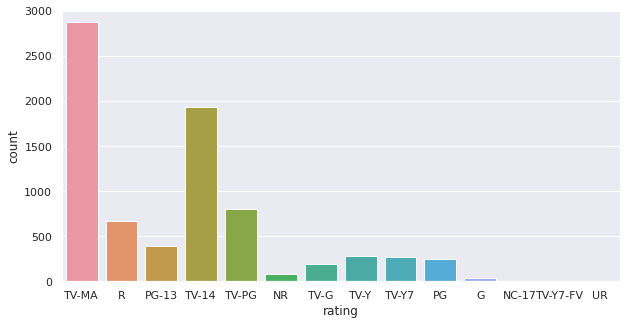

In [30]:
# Age ratings for shows in the dataset
plt.figure(figsize=(10,5))
sns.countplot(x='rating',data=df)
plt.show()

Highest number of shows on Netflix are rated by TV-MA, followed by TV-14 and TV-PG

In [31]:
#Assigning the Ratings into grouped categories
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
df['rating'] = df['rating'].replace(ratings)

In [32]:
df['rating'].unique()

array(['Adults', 'Teens', 'Older Kids', 'Kids'], dtype=object)

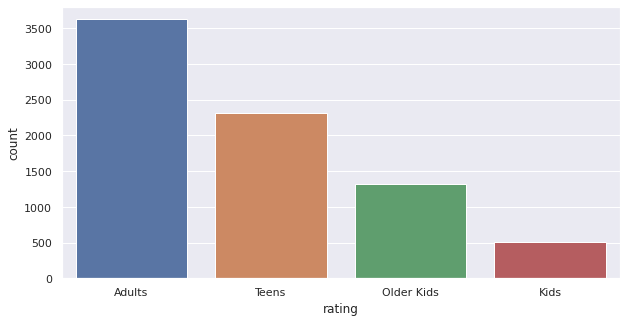

In [33]:
# Age ratings for shows in the dataset
plt.figure(figsize=(10,5))
sns.countplot(x='rating',data=df)
plt.show()

### What all manipulations have you done and insights you found?

* There are some movies / TV shows that were filmed in multiple countries, have multiple genres associated with it.
* To simplify the analysis, let's consider only the primary country where that respective movie / TV show was filmed.
* Also, let's consider only the primary genre of the respective movie / TV show.
* We have converted the type of the 'duration' from string to int.
* We have converted the type of the 'date_added' from string to datetime format.
* Around 50% of shows on Netflix are produced for adult audience. Followed by Teens, older kids and kids. Netflix has the least number of shows that are specifically produced for teenagers than other age groups

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

##**Univatiate Analysis**

#### Chart - 1 Movies and TV Shows in the dataset

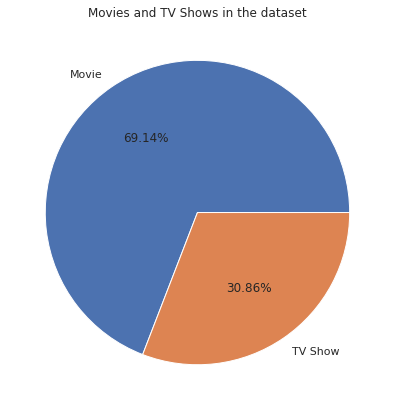

In [34]:
# Chart - 1 visualization code
# Number of Movies and TV Shows in the dataset
plt.figure(figsize=(7,7))
df.type.value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.ylabel('')
plt.title('Movies and TV Shows in the dataset')
plt.show()

##### 1. Why did you pick the specific chart?

To get the distribution of Movies and TV Shows.

##### 2. What is/are the insight(s) found from the chart?

There are more movies (69.14%) than TV shows (30.86%) in the dataset.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insight reveal that users tend to watch movies more frequently than TV shows, then Netflix may choose to allocate more resources towards acquiring and producing movies.

There any insights that lead to negative growth, no I don't think so. 

#### Chart - 2 Top 10 directors by number of shows directed

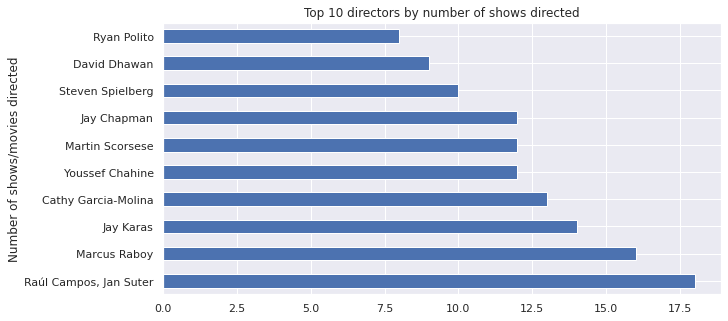

In [35]:
# Chart - 2 visualization code
# Top 10 directors in the dataset
plt.figure(figsize=(10,5))
df[~(df['director']=='Unknown')].director.value_counts().nlargest(10).plot(kind='barh')
plt.ylabel('Number of shows/movies directed')
plt.title('Top 10 directors by number of shows directed')
plt.show()

##### 1. Why did you pick the specific chart?

To get the bar graph on Top 10 directors by number of shows directed.

##### 2. What is/are the insight(s) found from the chart?

Raul Campos and Jan Suter together have directed 18 movies / TV shows, higher than anyone in the dataset.

Followed by Marcus Raboy, Jay Karas and Cathy Gracia-Molina these are some of the directors who have directed above 12 movies / TV shows in the dataset.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Knowing which directors have directed the most content can be helpful in identifying patterns or trends in the types of content that are being produced, which can help guide decision-making around content acquisition and development.

For example, if certain directors have a track record of producing successful movies or TV shows, then it may make sense for Netflix to prioritize working with those directors or acquiring their content.

#### Chart - 3 Number of Shows Added by Year and Months

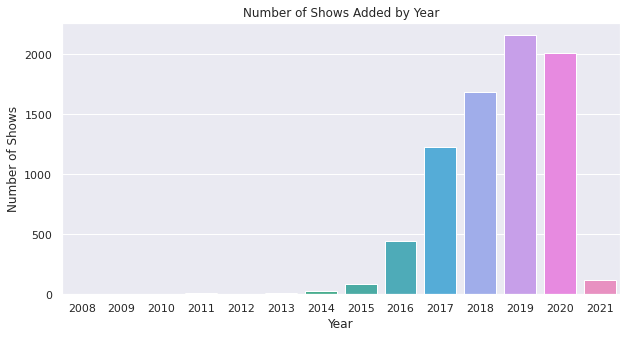

In [36]:
# Create a count plot of the number of shows added by year
plt.figure(figsize = (10,5)) 
sns.countplot(x='year_added', data=df)

# Set the plot title and axis labels
plt.title('Number of Shows Added by Year')
plt.xlabel('Year')
plt.ylabel('Number of Shows')

# Show the plot
plt.show()

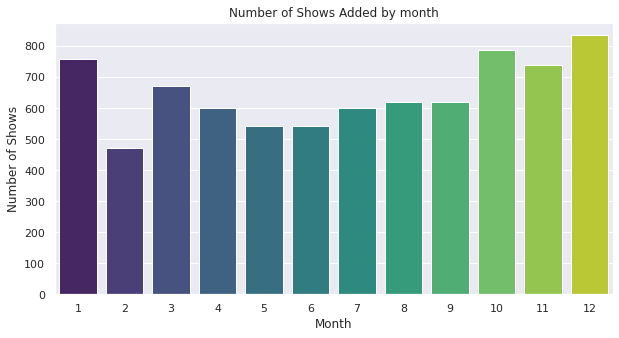

In [37]:
# number of shows added by month
plt.figure(figsize = (10,5)) 
sns.countplot(x='month_added', data=df, palette="viridis")

# Set the plot title and axis labels
plt.title('Number of Shows Added by month')
plt.xlabel('Month')
plt.ylabel('Number of Shows')

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

A count plot of the number of shows added by year & month.

##### 2. What is/are the insight(s) found from the chart?

* Netflix continuous to add more shows on its platform over the years.
* There is a decrease in the number of shows added in the year 2020, which might be attributed to the covid-19-induced lockdowns, which halted the creation of shows.
* We have Netflix data only up to 16th January 2021, hence there are less movies added in this year.
* Over the years a greater number of shows were added in the months of October, November, December, and January.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

These insights can help Netflix make more informed decisions about their content strategy, which could lead to increased viewership and revenue.

The months of October, November, December, and January can also be used by Netflix to optimize their content release strategy.

#### Chart - 4 Top 15 Genres on Netflix

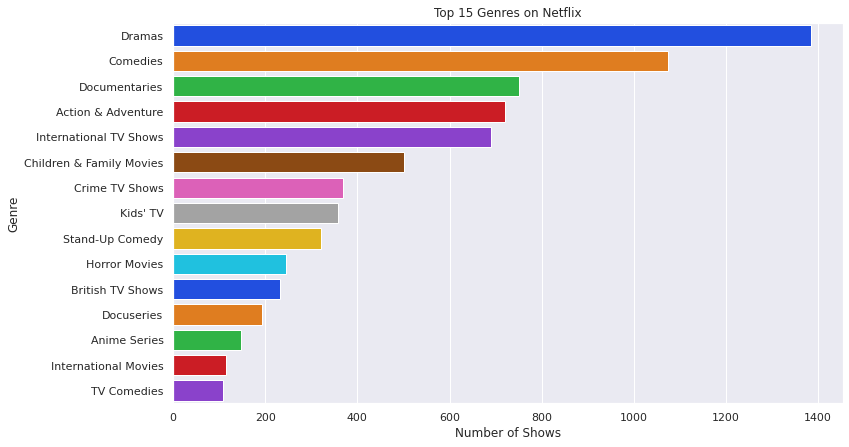

In [38]:
# Chart - 4 visualization code
# Get the top 15 genres by count
top_genres = df['listed_in'].value_counts().head(15).index.tolist()
plt.figure(figsize=(12,7))
sns.countplot(y='listed_in',data=df, order=top_genres, palette="bright")
plt.title('Top 15 Genres on Netflix')
plt.xlabel('Number of Shows')
plt.ylabel('Genre')
plt.show()

##### 1. Why did you pick the specific chart?

Count plot on Y axis to get the Top 15 Genres on Netflix.

##### 2. What is/are the insight(s) found from the chart?

* Most of the peoples are interested in dramas it is the most popular genre followed by comedies and documentaries.
* These three genres account for about 41% of all movies and TV shows.
* This value increases to about 85% for top 15 genres.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Most of the production companies or content creators looking to create new shows for Netflix could use this information to guide their decisions on which genres to focus on.

#### Chart - 5 The distribution of Movie Durations

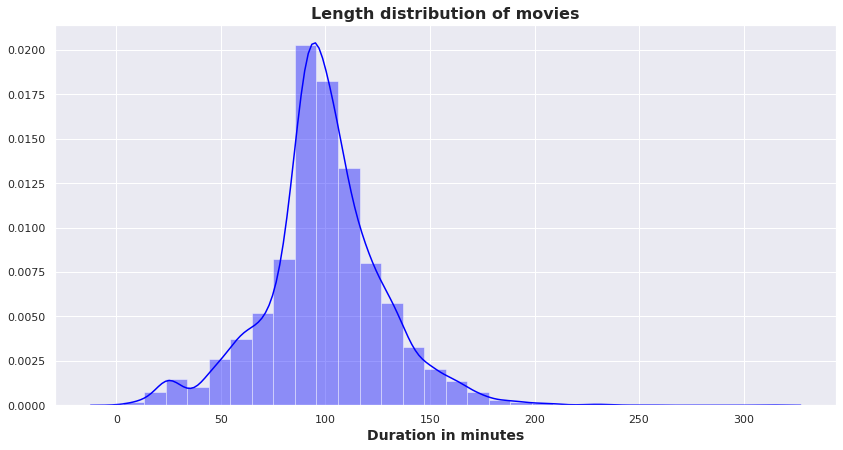

In [39]:
# Chart - 5 visualization code
#Checking the distribution of Movie Durations
movie_df = df[df['type']=='Movie']

plt.figure(figsize=(14, 7))

sns.distplot(movie_df['duration'], bins=30,color='Blue').set(ylabel=None)

plt.title('Length distribution of movies', fontsize=16,fontweight="bold")
plt.xlabel('Duration in minutes', fontsize=14 ,fontweight="bold")
plt.show()

##### 1. Why did you pick the specific chart?

Distribution of Movie Durations.

##### 2. What is/are the insight(s) found from the chart?

* The average length of a TV show episode on Netflix is around 44 minutes, while the average length of a movie on Netflix is around 1 hour and 43 minutes.
* Netflix do have some short-form content like comedy specials and documentaries, the majority of their content consists of full-length TV shows and movies that are typically much longer than 10 minutes.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Longer TV shows and movies require more investment, both in terms of production costs and licensing fees. Netflix needs to balance the costs of producing or acquiring longer content with the potential revenue generated from it.

##**Bivariate analysis**

#### Chart - 6  Number of shows released each year since 2008.

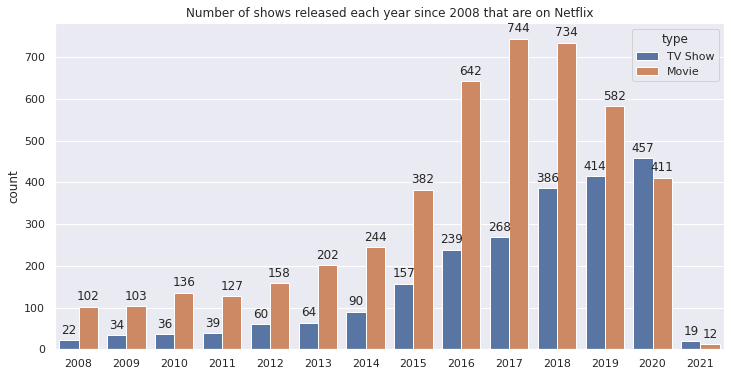

In [40]:
# Chart - 6 visualization code
# Number of shows released each year since 2008
order = range(2008,2022)
plt.figure(figsize=(12,6))
p = sns.countplot(x='release_year',data=df, hue='type',
                  order = order)
plt.title('Number of shows released each year since 2008 that are on Netflix')
plt.xlabel('')
for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha\
             = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

##### 1. Why did you pick the specific chart?

To check Number of shows released each year since 2008.

##### 2. What is/are the insight(s) found from the chart?

* Over the years, Netflix has consistently focused on adding more shows in its platform.
* Tv Shows - Most of the tv shows were released in year 2020, there has always been an increase in the no of Tv shows released from 2008.
* Movies - Most of the movies were released in year 2017 followed by 2018,16 and 2019. From 2019 there was a sudden decrease in the release for the movies this may be because of the covid.
* But in 2021 Netflix is increasingly concentrating on introducing more TV series to its platform rather than movies.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* The increasing concentration on TV series in 2021 could be a strategic move by Netflix to attract more subscribers who prefer longer-form content.
* Additionally, TV shows can help drive engagement and retention, leading to increased revenue for the platform.
* The decrease in the number of movie releases since 2019, likely due to the COVID-19 pandemic, could have a negative impact on Netflix's business.

#### Chart - 7  Number of shows added each month on Netflix

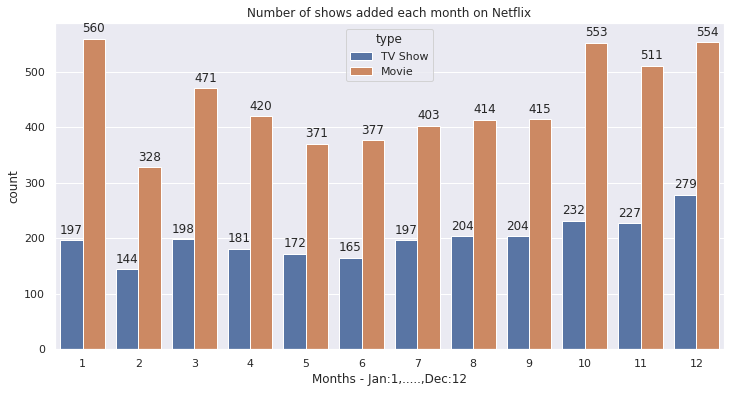

In [41]:
# Chart - 7 visualization code
# Number of shows added each month 
plt.figure(figsize=(12,6))
p = sns.countplot(x='month_added',data=df, hue='type')
plt.title('Number of shows added each month on Netflix')
plt.xlabel('Months - Jan:1,.....,Dec:12')
for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha\
             = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

##### 1. Why did you pick the specific chart?

To show no. of shows added in different months to Netflix Platform.

##### 2. What is/are the insight(s) found from the chart?

* From October to January Netflix has more consistently focused on adding more shows in its platform.
* Most of the Tv show were added in the month of december and least at june.
* For Movies most of the movies were added in the month of January and least in the of febuary.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* In December 2019,20 may also be a response to the COVID-19 pandemic, as people were more likely to stay at home during the holidays and consume more content. By adding more TV shows during this time, Netflix can cater to the increased demand for content.
* The concentration of movie additions in January suggests that Netflix may be targeting the start of the new year, a time when people may be looking for fresh content to watch.

#### Chart - 8 Average movie length over the years

In [42]:
# Movie release year statistics
df[df['type']== 'Movie'].release_year.describe()

count    5377.000000
mean     2012.920030
std         9.663282
min      1942.000000
25%      2012.000000
50%      2016.000000
75%      2018.000000
max      2021.000000
Name: release_year, dtype: float64

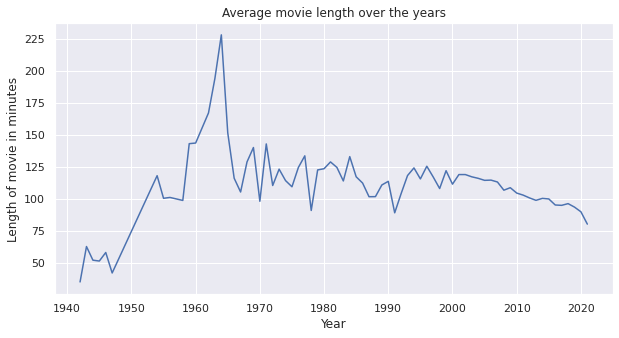

In [43]:
# Chart - 8 visualization code
# Average movie length over the years
plt.figure(figsize=(10,5))
df[df['type']=='Movie'].groupby('release_year')['duration'].mean().plot(kind='line')
plt.title('Average movie length over the years')
plt.ylabel('Length of movie in minutes')
plt.xlabel('Year')
plt.show()

##### 1. Why did you pick the specific chart?

To get the line graph of average movie length over the years.

##### 2. What is/are the insight(s) found from the chart?

* Netflix has several movies on its site, including those that were released in way back 1942.
* As per the plot, movies made in the 1940s had a fairly short duration on average.
* On average, movies made in the 1960s have the longest movie length.
* The average length of a movie has been continuously decreasing since the 2000s.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* By providing a wide range of options, Netflix can cater to the needs of different age groups and demographics, increasing the number of subscribers and viewership.
* On the other hand, viewers who prefer shorter movies may not find these titles attractive, which could lead to a lower engagement rate.
* The impact of movie length on Netflix's business would depend on the preferences of its subscribers and the availability of a diverse range.

#### Chart - 9 The heatmap of Netflix show's categories

In [44]:
# Preparing data for heatmap
df['count'] = 1
data = df.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['country']


df_heatmap = df.loc[df['country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['country'],df_heatmap['rating'],normalize = "index").T
df_heatmap


country,Canada,France,India,Japan,Mexico,South Korea,Spain,United Kingdom,United States,Unknown
rating,,,,,,,,,,
Adults,0.467181,0.627551,0.259414,0.368644,0.764228,0.463918,0.797619,0.526042,0.489051,0.320158
Kids,0.150579,0.086735,0.015690,0.008475,0.016260,0.046392,0.035714,0.078125,0.074731,0.169960
Older Kids,0.220077,0.112245,0.163180,0.275424,0.089431,0.123711,0.053571,0.184028,0.196038,0.235178
Teens,0.162162,0.173469,0.561715,0.347458,0.130081,0.365979,0.113095,0.211806,0.240181,0.274704


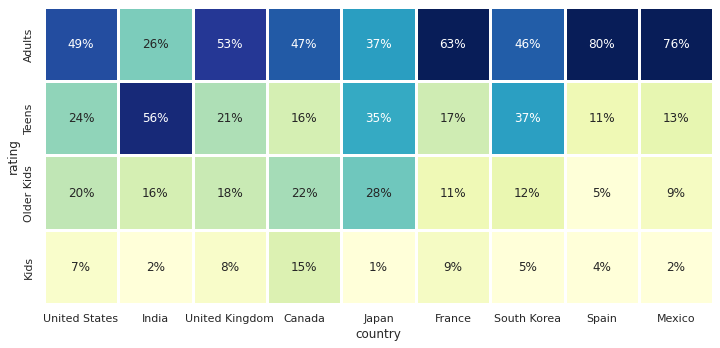

In [45]:
# Chart - 9 visualization code
# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain',
       'Mexico']

age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

sns.heatmap(df_heatmap.loc[age_order,country_order2],cmap="YlGnBu",square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})
plt.show()

##### 1. Why did you pick the specific chart?

To get the heatmap of Netflix show's categories in different countries with different age group.

##### 2. What is/are the insight(s) found from the chart?

The US and UK are closely aligned with their Netflix target ages, but radically different from, example, India or Japan!

Also, Mexico and Spain have similar content on Netflix for different age groups.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* Netflix viewers in India are younger, then Netflix may want to focus on producing more content that appeals to that demographic.
* The similarities in content for different age groups in Mexico and Spain may indicate that these countries share similar cultural preferences and interests, which could lead to cost savings for Netflix

#### Chart - 10 Analysing top10 genre of the movies and Tv shows

In [46]:
# assigning 2 new dataframe 'movies' and 'tv_shows'
movies = df[df['type']== 'Movie']
tv_shows = df[df['type']== 'TV Show']

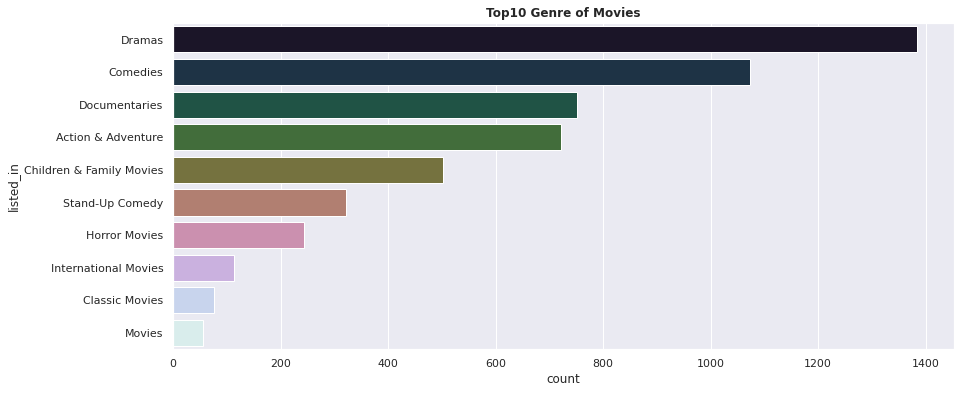

In [47]:
# Chart - 10 visualization code
#Analysing top10 genre of the movies
plt.figure(figsize=(14,6))
plt.title('Top10 Genre of Movies',fontweight="bold")
sns.countplot(y=movies['listed_in'],data=movies,order=movies['listed_in'].value_counts().index[0:10],palette="cubehelix")
plt.show()

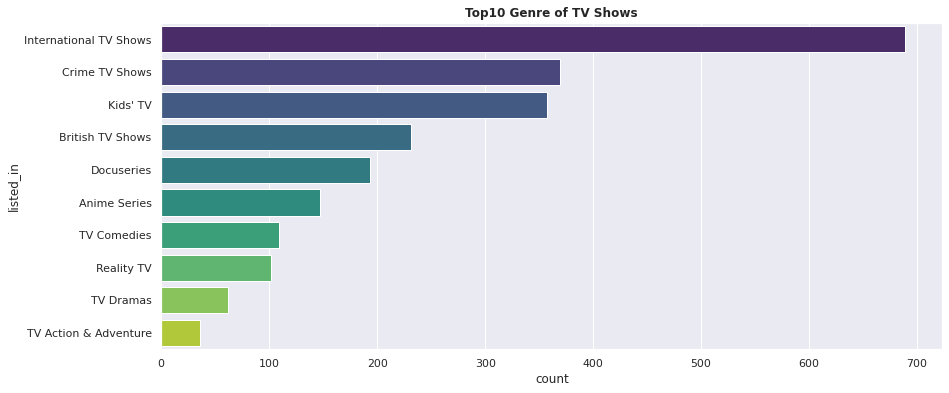

In [48]:
#Analysing top10 genres of TVSHOWS
plt.figure(figsize=(14,6))
plt.title('Top10 Genre of TV Shows',fontweight="bold")
sns.countplot(y=tv_shows['listed_in'],data=tv_shows,order=tv_shows['listed_in'].value_counts().index[0:10],palette="viridis")
plt.show()

##### 1. Why did you pick the specific chart?

To analysing top10 genre of the movies and Tv shows.

##### 2. What is/are the insight(s) found from the chart?

* Most of the movies have Drama as their genre because it has mostly liked by the audiance followed by genre - Comidies, Documentry, and Action and Adventure.
* In the case of TV Show the most liked genre is 'International Tv show' among any other genre in case of TV Shows.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* If drama is the most liked genre by the audience, then it can indicate that investing in drama movies can yield higher returns for content creators and distributors.
* International TV shows are the most liked genre among the audience, then it can indicate that there is a significant opportunity for acquiring and licensing international TV shows for streaming platforms.

#### Chart - 11 Top-10 ACTORS on Netflix

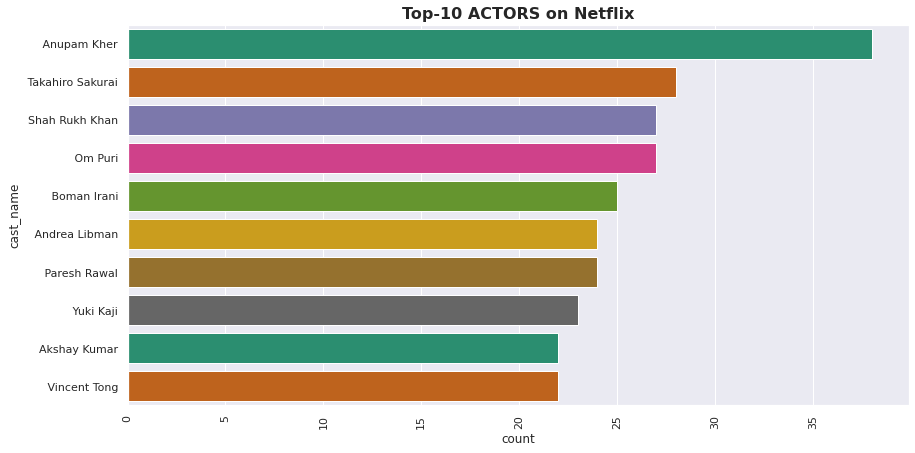

In [49]:
# Chart - 12 visualization code
# Top 10 actors netflix
df['cast_name'] = df['cast'].apply(lambda x :  x.split(',')) 
cast_count = []
for i in df['cast_name']: cast_count += i
cast_dict = dict((i, cast_count.count(i)) for i in cast_count)
df_cast_count = pd.DataFrame(cast_dict.values(),cast_dict.keys()).reset_index().sort_values(0,ascending=False).rename(
    columns = {'index' : 'cast_name', 0 : 'count'}).iloc[1:11]
plt.figure(figsize=(14,7))
sns.barplot(x='count',y='cast_name',data=df_cast_count,palette="Dark2")
plt.title("Top-10 ACTORS on Netflix",size='16',fontweight="bold")
plt.xticks(rotation=90)
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

The top actor on Netflix Movies, based on the number of titles, is Anupam Kher.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12 - Correlation Heatmap

In [50]:
# Movie Genres heatmap function
def genre_heatmap(df, title):
    df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
    Types = []
    for i in df['genre']: Types += i
    Types = set(Types)
    print("There are {} types in the Netflix {} Dataset".format(len(Types),title))    
    test = df['genre']
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
    corr = res.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(10, 7))
    fig.text(.54,.88,'Genre correlation', fontfamily='serif',fontweight='bold',fontsize=15)
    fig.text(.75,.665,
            '''
             It is interesting that Independant Movies
             tend to be Dramas. 
             
             Another observation is that 
             Internatinal Movies are rarely
             in the Children's genre.
             ''', fontfamily='serif',fontsize=12,ha='right')
    pl = sns.heatmap(corr, mask=mask, cmap='afmhot_r', vmax=.3, vmin=-.3, center=0, square=True, linewidths=2.5)
    
    plt.show()

There are 19 types in the Netflix Movie Dataset


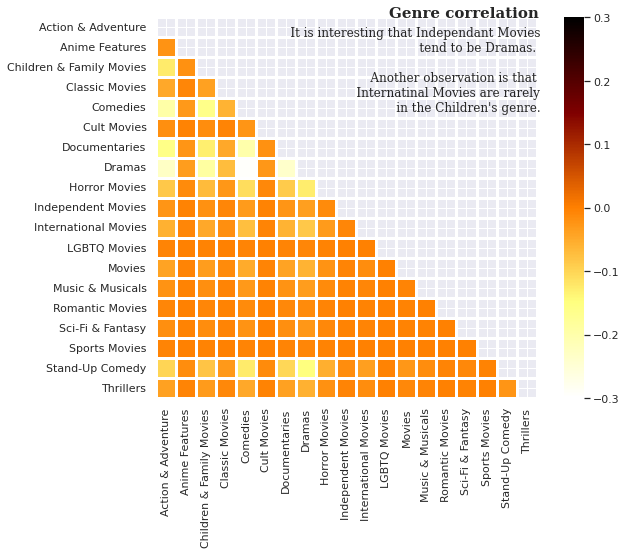

In [51]:
# Correlation Heatmap visualization code
df_tv = df[df["type"] == "TV Show"]
df_movies = df[df["type"] == "Movie"]


genre_heatmap(df_movies, 'Movie')
plt.show()

##### 1. Why did you pick the specific chart?

By ploting the heatmep we got 19 types in the Netflix Movie genre relation.

##### 2. What is/are the insight(s) found from the chart?

* Dramas can be a powerful medium for exploring these themes and creating meaningful conversations among audiences.
* Children's films often require a significant amount of resources and production values to create a visually immersive world that appeals to young audiences.
* Firstly, dramas tend to be more character-driven and explore complex themes and issues, which can be more challenging to finance and produce within the constraints of a studio system.
* Many international filmmakers may feel that their artistic vision is better suited to adult-oriented content, or they may be focused on addressing important social or political issues through their work,

#### Chart - 13 - Pair Plot 

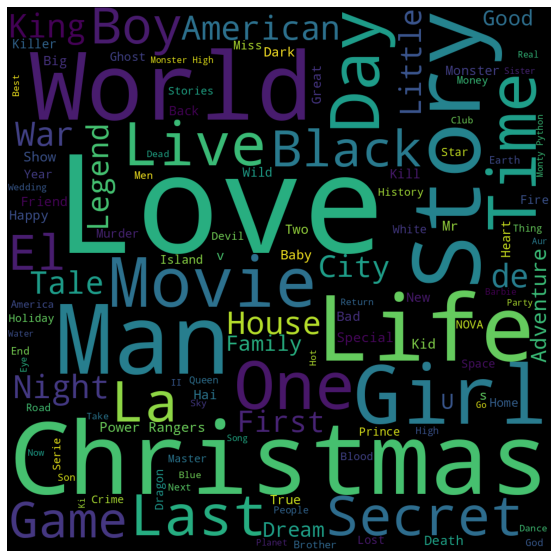

In [52]:
# Pair Plot visualization code
#Most Popular Titles
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
plt.rcParams['figure.figsize'] = (10, 10)
wordcloud = WordCloud(stopwords=STOPWORDS,background_color = 'black', width = 1000,  height = 1000, max_words = 121).generate(' '.join(df['title']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

##### 1. Why did you pick the specific chart?

To get the most Popular Titles

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

HO: netflix has more movies than tv shows

H1: netflix not have more movies than TV SHOWS

#### 2. Perform an appropriate statistical test.

In [53]:
# Perform Statistical Test to obtain P-Value
df['type'].value_counts()

Movie      5377
TV Show    2400
Name: type, dtype: int64

In [54]:
#making copy of df_clean_frame
df_hypothesis=df.copy()
#head of df_hypothesis
df_hypothesis.head(2)

,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month_added,year_added,count,cast_name
show_id,,,,,,,,,,,,,,
s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,Adults,4,International TV Shows,In a future where the elite inhabit an island ...,8,2020,1,"[João Miguel, Bianca Comparato, Michel Gomes..."
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,Adults,93,Dramas,After a devastating earthquake hits Mexico Cit...,12,2016,1,"[Demián Bichir, Héctor Bonilla, Oscar Serran..."


In [55]:
#filtering movie from Type_of_show column
df_hypothesis = df_hypothesis[df_hypothesis["type"] == "Movie"]

In [56]:
#group_by duration and target_ages                 
group_by_= df_hypothesis[['duration','rating']].groupby(by='rating')
#mean of group_by variable
group=group_by_.mean().reset_index()
group

,rating,duration
0,Adults,98.230769
1,Kids,66.486891
2,Older Kids,92.024648
3,Teens,110.025332


In [57]:
#In A and B variable grouping values 
A= group_by_.get_group('Kids')
B= group_by_.get_group('Older Kids')
#mean and std. calutation for kids and older kids variables
M1 = A.mean()
S1 = A.std()

M2= B.mean()
S2 = B.std()

In [58]:
from scipy.stats import ttest_ind
ttest,pval = ttest_ind(M1, M2)
print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

nan
accept null hypothesis


##### Which statistical test have you done to obtain P-Value?

The t-test is a common statistical test used to compare the means of two independent groups, and it assumes that the two groups have normal distributions with equal variances. 

##### Why did you choose the specific statistical test?

The p-value obtained from the t-test indicates the probability of observing a difference as large as or larger than the one observed, assuming the null hypothesis is true.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H0:  The duration which are more than 90 mins are TV Shows

H1:  The duration which is more than 90 mins are movies

#### 2. Perform an appropriate statistical test.

In [59]:
#group_by duration and target_ages                 
group_by_= df[['duration','type']].groupby(by='type')
#mean of group_by variable
group=group_by_.mean().reset_index()
group

,type,duration
0,Movie,99.307978
1,TV Show,1.760833


In [60]:
# Perform Statistical Test to obtain P-Value
#In A and B variable grouping values 
A= group_by_.get_group('Movie')
B= group_by_.get_group('TV Show')
#mean and std. calutation for kids and older kids variables
M1 = A.mean()
S1 = A.std()

M2= B.mean()
S2 = B.std()

print('Mean for movies rated for Kids {} \n Mean for  movies rated for older kids {}'.format(M1,M2))
print('Std for  movies rated for Older Kids {} \n Std for  movies rated for kids {}'.format(S2,S1))

Mean for movies rated for Kids duration    99.307978
dtype: float64 
 Mean for  movies rated for older kids duration    1.760833
dtype: float64
Std for  movies rated for Older Kids duration    1.560603
dtype: float64 
 Std for  movies rated for kids duration    28.530881
dtype: float64


In [61]:
#import stats 
from scipy import stats
#length of groups and DOF
n1 = len(A)
n2= len(B)
print(n1,n2)

dof = n1+n2-2
print('dof',dof)

sp_2 = ((n2-1)*S1**2  + (n1-1)*S2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

#tvalue
t_val = (M1-M2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])

5377 2400
dof 7775
SP_2 = duration    252.849635
dtype: float64
SP duration    15.901246
dtype: float64
tvalue 249.8923650639716


In [62]:
#t-distribution
stats.t.ppf(0.975,dof)

1.960269146507245

##### Which statistical test have you done to obtain P-Value?

Because the t-value is not in the range, the null hypothesis is rejected.

##### Why did you choose the specific statistical test?

As a result, The duration which is more than 90 mins are movies

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [63]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [64]:
# Handling Missing Values & Missing Value Imputation
# Using the original dataset for clustering since
df1 = df.copy()

In [65]:
df1.fillna('',inplace=True)

#### What all missing value imputation techniques have you used and why did you use those techniques?

It does not require handling missing values.

### 2. Handling Outliers

In [66]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Not required.

### 3. Categorical Encoding

In [67]:
# Encode your categorical columns
# Combining all the clustering attributes into a single column

df1['clustering_attributes'] = (df1['director'] + ' ' + 
                                df1['cast'] +' ' + 
                                df1['country'] +' ' + 
                                df1['listed_in'] +' ' + 
                                df1['description'])

In [68]:
df1.head(2)

,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month_added,year_added,count,cast_name,clustering_attributes
show_id,,,,,,,,,,,,,,,
s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,Adults,4,International TV Shows,In a future where the elite inhabit an island ...,8,2020,1,"[João Miguel, Bianca Comparato, Michel Gomes...","Unknown João Miguel, Bianca Comparato, Michel ..."
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,Adults,93,Dramas,After a devastating earthquake hits Mexico Cit...,12,2016,1,"[Demián Bichir, Héctor Bonilla, Oscar Serran...","Jorge Michel Grau Demián Bichir, Héctor Bonill..."


In [69]:
# random check on clustering_attributes
df1['clustering_attributes'][47]

'Leif Tilden Billy Crudup, Graham Rogers, Liana Liberato, Stefanie Scott, Tim Roth, Melanie Lynskey, Thomas Cocquerel, Peter Coyote United States Dramas After escaping the bus accident that killed his girlfriend, a high school student channels his grief into running, with the help of a new coach.'

We have successfully added all the necessary data into a single column

#### What all categorical encoding techniques have you used & why did you use those techniques?

Combined all the clustering attributes into a single column for further processing.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [70]:
# Expand Contraction
#  function to remove non-ascii characters

def remove_non_ascii(words):
    """Function to remove non-ASCII characters"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

In [71]:
# remove non-ascii characters
df1['clustering_attributes'] = remove_non_ascii(df1['clustering_attributes'])

In [72]:
df1['clustering_attributes'][47]

'Leif Tilden Billy Crudup, Graham Rogers, Liana Liberato, Stefanie Scott, Tim Roth, Melanie Lynskey, Thomas Cocquerel, Peter Coyote United States Dramas After escaping the bus accident that killed his girlfriend, a high school student channels his grief into running, with the help of a new coach.'

* We have successfully removed all non-ascii characters from the corpus.

Non-ASCII characters are those that are not encoded in ASCII, such as Unicode, EBCDIC, etc. 

ASCII is limited to 128 characters and was initially developed for the English language. Example - á, é, ñ, ç, ä, ü, æ, ø, ß, etc

#### 2. Remove stopwords and lower case

In [73]:
# Remove stopwords and Lower Casing
# extracting the stopwords from nltk library
import nltk
from nltk.corpus import stopwords
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [74]:
# function to remove stop words
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [75]:
# Removing stop words
df1['clustering_attributes'] = df1['clustering_attributes'].apply(stopwords)

In [76]:
df1['clustering_attributes'][47]

'leif tilden billy crudup, graham rogers, liana liberato, stefanie scott, tim roth, melanie lynskey, thomas cocquerel, peter coyote united states dramas escaping bus accident killed girlfriend, high school student channels grief running, help new coach.'

* We have successfully removed all the stopwords and converted the clustering_attributes to lowercase.

#### 3. Removing Punctuations

In [77]:
# Remove Punctuations
# function to remove punctuations
def remove_punctuation(text):
    '''a function for removing punctuation'''
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [78]:
# Removing punctuation marks
df1['clustering_attributes'] = df1['clustering_attributes'].apply(remove_punctuation)

In [79]:
df1['clustering_attributes'][47]

'leif tilden billy crudup graham rogers liana liberato stefanie scott tim roth melanie lynskey thomas cocquerel peter coyote united states dramas escaping bus accident killed girlfriend high school student channels grief running help new coach'

* We have successfully dropped all the punctuation marks from the clustering_attributes.

#### 4. Removing URLs & Removing words and digits contain digits.

In [80]:
#function to Remove URLs
def remove_urls(text):
    """
    Removes URLs from a string of text.
    """
    return re.sub(r"http\S+", "", text)

In [81]:
# function to Remove words and digits contain digits
def remove_words_digits_with_digits(text):
    """
    Removes words and digits containing digits from a string of text.
    """
    return re.sub(r"\b\w*\d\w*\b", "", text)

In [82]:
# Remove URLs 
df1['clustering_attributes'] = df1['clustering_attributes'].apply(remove_urls)

In [83]:
# Remove words and digits contain digits
df1['clustering_attributes'] = df1['clustering_attributes'].apply(remove_words_digits_with_digits)

In [84]:
df1['clustering_attributes'][47]

'leif tilden billy crudup graham rogers liana liberato stefanie scott tim roth melanie lynskey thomas cocquerel peter coyote united states dramas escaping bus accident killed girlfriend high school student channels grief running help new coach'

* We have successfully removed URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [85]:
# Remove Stopwords
# already removed

In [86]:
# Remove White spaces
# not required

#### 6. Lemmatization

In [87]:
# function to lemmatize the corpus
def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

In [88]:
# Lemmatization
df1['clustering_attributes'] = lemmatize_verbs(df1['clustering_attributes'])

In [89]:
df1['clustering_attributes'][47]

'leif tilden billy crudup graham rogers liana liberato stefanie scott tim roth melanie lynskey thomas cocquerel peter coyote united states dramas escaping bus accident killed girlfriend high school student channels grief running help new coach'

* We have lemmatized the clustering_attributes.

#### 7. Tokenization

In [90]:
# Tokenization
tokenizer = TweetTokenizer()

In [91]:
df1['clustering_attributes'] = df1['clustering_attributes'].apply(lambda x: tokenizer.tokenize(x))

In [92]:
df1['clustering_attributes'].head(10)

show_id
s1     [unknown, joao, miguel, bianca, comparato, mic...
s2     [jorge, michel, grau, demian, bichir, hector, ...
s3     [gilbert, chan, tedd, chan, stella, chung, hen...
s4     [shane, acker, elijah, wood, john, c, reilly, ...
s5     [robert, luketic, jim, sturgess, kevin, spacey...
s6     [serdar, akar, erdal, besikcioglu, yasemin, al...
s7     [yasir, al, yasiri, amina, khalil, ahmed, dawo...
s8     [kevin, reynolds, samuel, l, jackson, john, he...
s9     [shravan, kumar, divya, dutta, atul, kulkarni,...
s10    [vikram, bhatt, rajneesh, duggal, adah, sharma...
Name: clustering_attributes, dtype: object

#### 8. Text Normalization

In [93]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [94]:
# POS Taging

#### 10. Text Vectorization

In [95]:
# clustering tokens saved in a variable
clustering_data = df1['clustering_attributes']

In [96]:
# Vectorizing Text
def identity_tokenizer(text):
    return text

# Using TFIDF vectorizer to vectorize the corpus 
# max features = 20000 to prevent system from crashing
tfidf = TfidfVectorizer(tokenizer=identity_tokenizer, stop_words='english', lowercase=False,max_features = 20000)    
X = tfidf.fit_transform(clustering_data)

In [97]:
X

<7777x20000 sparse matrix of type '<class 'numpy.float64'>'
	with 221951 stored elements in Compressed Sparse Row format>

In [98]:
# shape of X
X.shape

(7777, 20000)

In [99]:
# data type of vector
type(X)

scipy.sparse._csr.csr_matrix

In [100]:
# convert X into array form for clustering
X = X.toarray()

##### Which text vectorization technique have you used and why?

We can vectorize the corpus using TFIDF vectorizer, where TFIDF stands for - Term Frequency Inverse Document Frequency.

Some reasons why TF-IDF is a popular choice for text analysis using vectorization.
* Handles commonly occurring words
* Resolves the ambiguity of words
* Flexible feature selection
* Scalability & Versatility

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [101]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [102]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [103]:
# Transform Your data

### 6. Data Scaling

In [104]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

To simplify the model, and reduce dimensionality, we can take the top 2000 components, which will still be able to capture more than 50% of variance.

In [105]:
# DImensionality Reduction (If needed)
# Reduce dimensionality with PCA
pca = PCA(n_components=1000,random_state=42)
X_pca = pca.fit_transform(X)

In [106]:
# shape of transformed vectors
X_pca.shape

(7777, 1000)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

We can use PCA (Principal component Analysis) to reduce the dimensionality of data.

### 8. Data Splitting

In [107]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [108]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Clusters implementation***

### ML Model - 1 K-Means Clustering

Building clusters using the K-means clustering algorithm.

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=10), k=(2, 11),
                 locate_elbow=False, timings=False)

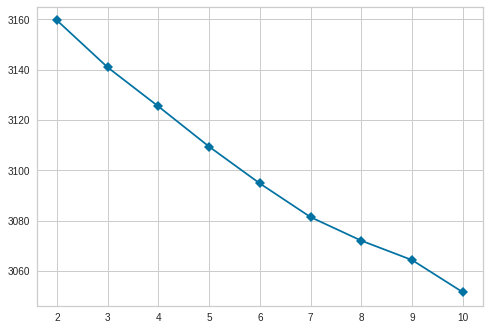

In [109]:
# ML Model - 1 Implementation
# Elbow method to find the optimal value of k
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,11), metric='distortion', timings=False, locate_elbow=False
)

visualizer.fit(X_pca)  

WCSS is defined as the sum of the squared distance between each member of the cluster and its centroid.

The sum of squared distance between each point and the centroid in a cluster (WCSS) decreases with the increase in the number of clusters.

#### 1. Explain the ML Model used and it's performance using Silhouette score for different umber of clusters.

In [110]:
# Visualizing evaluation Metric Score chart
# Plotting Silhouette score for different umber of clusters
range_n_clusters = range(2,16)
silhouette_avg = []
for num_clusters in range_n_clusters:
  # initialize kmeans
  kmeans = KMeans(n_clusters=num_clusters,init='k-means++',random_state=33)
  kmeans.fit(X_pca)
  cluster_labels = kmeans.labels_
  # silhouette score
  silhouette_avg.append(silhouette_score(X_pca, cluster_labels))

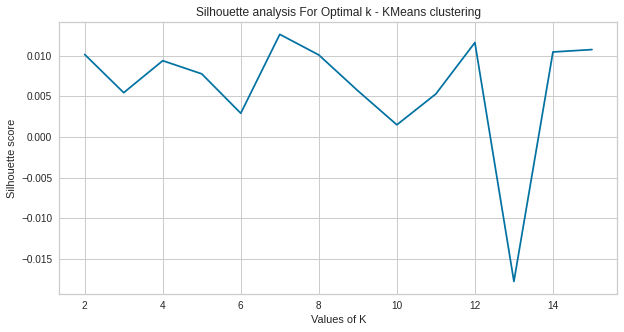

In [111]:
# ploting Silhouette score
plt.figure(figsize=(10,5))
plt.plot(range_n_clusters,silhouette_avg)
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

In [112]:
# Clustering the data into 19 clusters
kmeans = KMeans(n_clusters=7,init='k-means++',random_state=33)
kmeans.fit(X_pca)

KMeans(n_clusters=7, random_state=33)

The highest Silhouette score is obtained for 7 clusters.

In [113]:
# Evaluation metrics - distortion, Silhouette score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(X_pca, kmeans.labels_)

print((kmeans_distortion,kmeans_silhouette_score))

(3088.0727931740116, 0.012598711233837673)


In [114]:
# Adding a kmeans cluster number attribute
df1['kmeans_cluster'] = kmeans.labels_

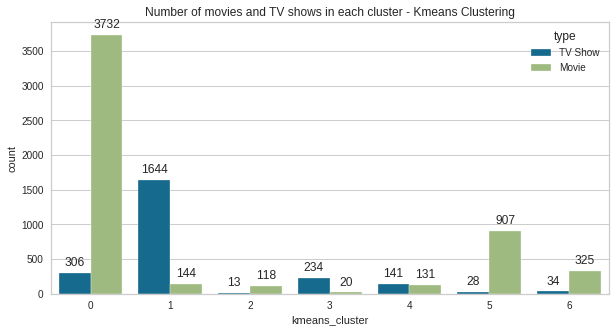

In [115]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
q = sns.countplot(x='kmeans_cluster',data=df1, hue='type')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()),
             ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

#### 2. Define the range of K values to try scatterplot

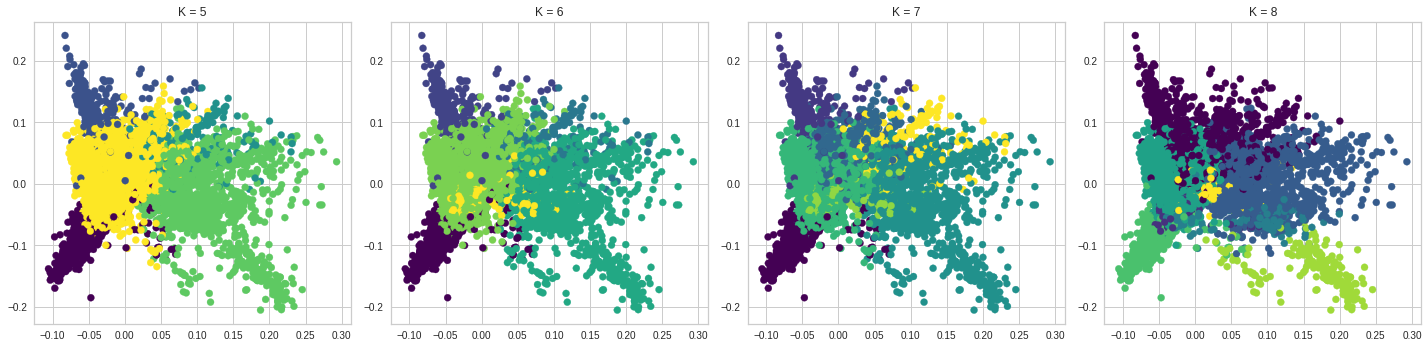

In [116]:
# Define the range of K values to try
krange = range(5,9)

# Create a figure with subplots for each K value
fig, axs = plt.subplots(1, len(krange), figsize=(len(krange)*5, 5))

# Fit a K-means model for each value of K and plot the results
for i, k in enumerate(krange):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(X_pca)
    axs[i].scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
    axs[i].set_title(f'K = {k}')

plt.tight_layout()
plt.show()

####**Building wordclouds for different clusters built**

In [117]:
# Building a wordcloud for the movie descriptions
def kmeans_wordcloud(cluster_num):
  comment_words = ''
  stopwords = set(STOPWORDS)

  # iterate through the csv file
  for val in df1[df1['kmeans_cluster']==cluster_num].description.values:
      
      # typecaste each val to string
      val = str(val)

      # split the value
      tokens = val.split()
      
      # Converts each token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()
      
      comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 700, height = 700,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10).generate(comment_words)


  # plot the WordCloud image                      
  plt.figure(figsize = (10,5), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)

These are 7 clusters of word formed from Kmeans Clustering


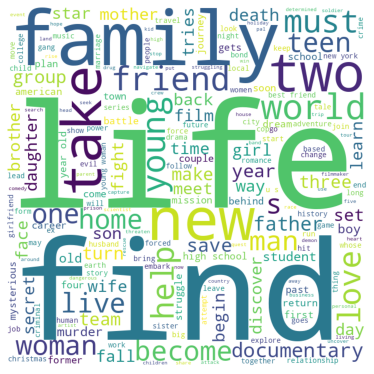

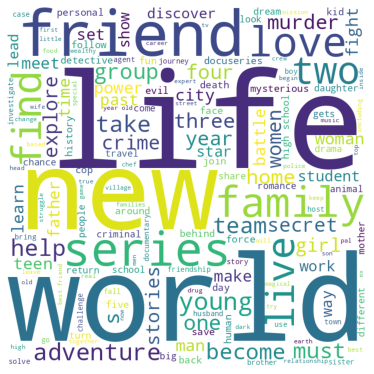

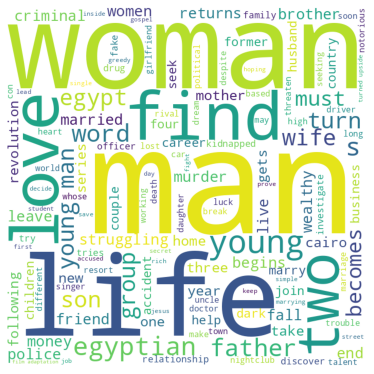

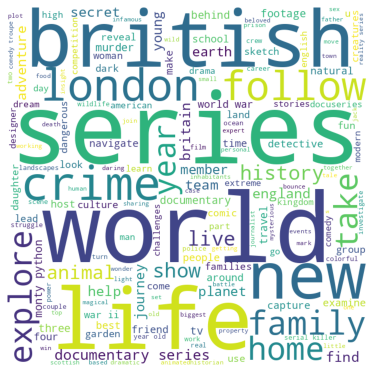

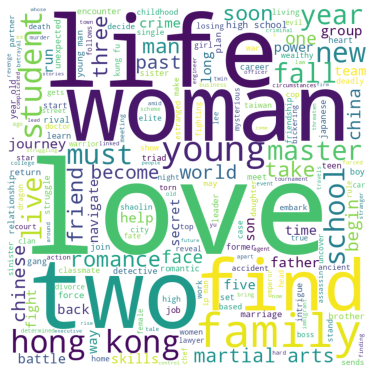

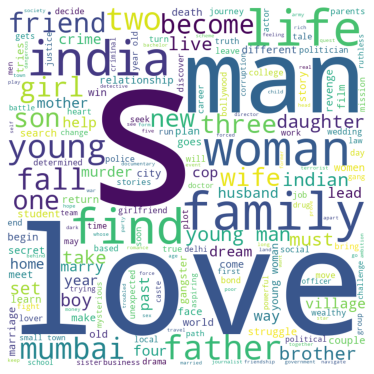

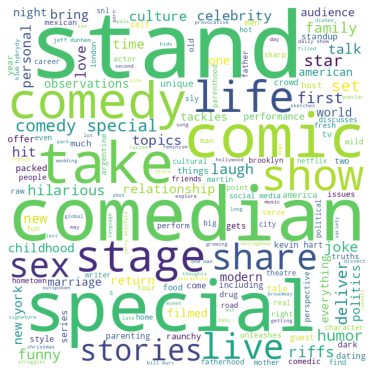

In [118]:
# Wordcloud for cluster 0, 1, 2, 3, 4, 5 & 6
for i in range(7):
    cluster_num = i
    result = kmeans_wordcloud(cluster_num)
  
print(f'These are 7 clusters of word formed from Kmeans Clustering')

* **Keywords observed in cluster 1**:-  world, find, family, friend, young, life, save, help, fast, mother, adventure, studentlife, new, discover, home, teen.
* **Keywords observed in cluster 2**:- series, become, World, team, past, group, must, secret, travel, battle, father, new, family.
* **Keywords observed in cluster 3**:- Egyptian, young, criminal, brother, become, drug, home, police, political, wife, seeking, following, wealthy, officer, husband.
* **Keywords observed in cluster 4**:- British, series, London, life, explore, following, documentary, series, annual, competition, sketch, journey, members, secret, footage, Britain, together, follow.
* **Keywords observed in cluster 5**:- master, family, student, school, year, soon, material, art, explore, begin, romance, Chinese, losing, call, encounter, start, decide.
* **Keywords observed in cluster 6**:- village, Indian, friend, young, daughter, husband, discover, small, town, mother, Mumbai, couples, government, stories, gangster, Welly, son, wife, boy, plot.
* **Keywords observed in cluster 7**:- stand, comic, special, comedian, deliver, hilarious, celebrity, stage, life, sex, rape, parenting, observation, comedy, special, film, hometown, dark, Martin, modern, childhood, political.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.


We have applied K-means clustering on a dataset of movies and TV shows and found that the highest Silhouette score was obtained with 7 clusters.

kmeans_distortion:- 3088.0727931740116

kmeans_silhouette_score:- 0.012598711233837673

### ML Model - 2 Hierarchical clustering

#### 1. Building clusters using the agglomerative (hierarchical) clustering algorithm.

Visualizing the dendrogram to decide on the optimal number of clusters for the agglomerative (hierarchical) clustering algorithm:

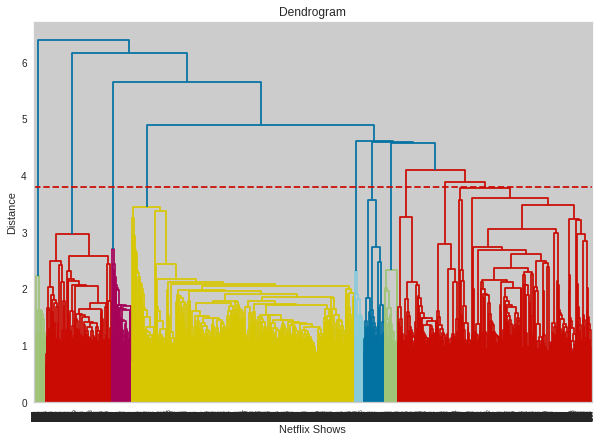

In [119]:
# Building a dendogram to decide on the number of clusters
plt.figure(figsize=(10, 7))  
dend = shc.dendrogram(shc.linkage(X_pca, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
plt.axhline(y= 3.8, color='r', linestyle='--')

At a distance of 3.8 units, 10 clusters can be built using the agglomerative clustering algorithm.

#### 2. Cross- Validation & Hyperparameter Tuning

In [120]:
# Fitting hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')  

# Fit the Algorithm
hierarchical.fit_predict(X_pca)

# Predict on the model

array([0, 4, 0, ..., 3, 1, 3])

In [121]:
# Adding a kmeans cluster number attribute
df1['hierarchical_cluster'] = hierarchical.labels_

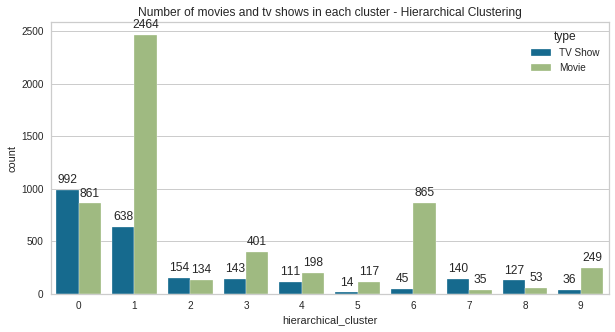

In [122]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
q = sns.countplot(x='hierarchical_cluster',data=df1, hue='type')
plt.title('Number of movies and tv shows in each cluster - Hierarchical Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()),
             ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3 Content based recommender system

In [131]:
# defining a new df for building a recommender system
recommender_df = df1.copy()
recommender_df.head()

,type,title,director,cast,country,release_year,rating,duration,listed_in,description,month_added,year_added,count,cast_name,clustering_attributes,kmeans_cluster,hierarchical_cluster
show_id,,,,,,,,,,,,,,,,,
s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,Adults,4,International TV Shows,In a future where the elite inhabit an island ...,8,2020,1,"[João Miguel, Bianca Comparato, Michel Gomes...","[unknown, joao, miguel, bianca, comparato, mic...",1,0
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,Adults,93,Dramas,After a devastating earthquake hits Mexico Cit...,12,2016,1,"[Demián Bichir, Héctor Bonilla, Oscar Serran...","[jorge, michel, grau, demian, bichir, hector, ...",0,4
s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,Adults,78,Horror Movies,"When an army recruit is found dead, his fellow...",12,2018,1,"[Tedd Chan, Stella Chung, Henley Hii, Lawre...","[gilbert, chan, tedd, chan, stella, chung, hen...",0,0
s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,Teens,80,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi...",11,2017,1,"[Elijah Wood, John C. Reilly, Jennifer Conne...","[shane, acker, elijah, wood, john, c, reilly, ...",0,1
s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,Teens,123,Dramas,A brilliant group of students become card-coun...,1,2020,1,"[Jim Sturgess, Kevin Spacey, Kate Bosworth, ...","[robert, luketic, jim, sturgess, kevin, spacey...",0,1


In [129]:
# Changing the index of the df from show id to show title
recommender_df['show_id'] = recommender_df.index

In [132]:
# converting tokens to string
def convert(lst):
  return ' '.join(lst)

recommender_df['clustering_attributes'] = recommender_df['clustering_attributes'].apply(lambda x: convert(x))


In [133]:
# setting title of movies/Tv shows as index
recommender_df.set_index('title',inplace=True)

In [134]:
# Count vectorizer
CV = CountVectorizer()
converted_matrix = CV.fit_transform(recommender_df['clustering_attributes'])

In [135]:
# Cosine similarity
cosine_similarity = cosine_similarity(converted_matrix)

### Developing a function to get 10 recommendations for a show

In [136]:
# Developing a function to get 10 recommendations for a show
indices = pd.Series(recommender_df.index)

def recommend_10(title, cosine_sim = cosine_similarity):
  try:
    recommend_content = []   
    idx = indices[indices == title].index[0]
    series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    top10 = list(series.iloc[1:11].index)
    # list with the titles of the best 10 matching movies
    for i in top10:
      recommend_content.append(list(recommender_df.index)[i])
    print("If you liked '"+title+"', you may also enjoy:\n")
    return recommend_content

  except:
    return 'Invalid Entry'

#### 1. Explain the ML Model used and it's performance 

In [137]:
# Visualizing evaluation 
# Recommendations for 'A Man Called God'
recommend_10('A Man Called God')

If you liked 'A Man Called God', you may also enjoy:



['One Spring Night',
 'Mr. Sunshine',
 'Rugal',
 'The King: Eternal Monarch',
 'Illang: The Wolf Brigade',
 'My Mister',
 'Extracurricular',
 'The Lies Within',
 'Reply 1994',
 'Private Lives']

In [138]:
# Recommendations for 'Stranger Things'
recommend_10('Stranger Things')

If you liked 'Stranger Things', you may also enjoy:



['Beyond Stranger Things',
 'Tread',
 'Prank Encounters',
 'Zombie Dumb',
 'Kiss Me First',
 'Henry Danger',
 'Haunted',
 'Living Undocumented',
 'Drug Lords',
 'Million Dollar Beach House']

In [141]:
# Recommendations for 'The Vampire Diaries'
recommend_10('The Vampire Diaries')

If you liked 'The Vampire Diaries', you may also enjoy:



['The Originals',
 'Living Undocumented',
 'Whose Streets?',
 'Highway to Heaven',
 'Mexico Diseña',
 'Inside the Criminal Mind',
 'The Bachelorette',
 'Sofia the First',
 'Roswell, New Mexico',
 'If Anything Happens I Love You']

In [142]:
# Recommendations for 'Dilwale Dulhania Le Jayenge'
recommend_10('Dilwale Dulhania Le Jayenge')

'Invalid Entry'

Invalid because the movie 'Dilwale Dulhania Le Jayenge' is not available on Netflix.

#### 2. Cross- Validation & Hyperparameter Tuning

In [125]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [126]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [127]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***